# 110. Malware Detection - binary classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.layers import Dense

df = pd.read_csv('datasets/malware.csv', index_col=0)
df.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
65416,VirusShare_3ede9b62781398a2e39a0f6af9356a54,3ede9b62781398a2e39a0f6af9356a54,332,224,258,10,0,117760,392192,0,...,5,3.425849,2.458492,4.035538,3146.400000,48,9640,72,15,0
23220,fxsocm.dll,9a0959a682d8eba06d0bd181c49ee2a8,332,224,8462,7,10,112640,29696,0,...,8,3.911994,2.669737,5.335373,1222.750000,164,4889,72,16,1
118017,VirusShare_abe7101746242c922a539ba461db4e38,abe7101746242c922a539ba461db4e38,332,224,258,10,0,119808,385024,0,...,6,3.776760,2.458492,5.317552,2740.166667,48,9640,72,15,0
69842,VirusShare_64a1247fc96d5bc2994ef89ca09adee8,64a1247fc96d5bc2994ef89ca09adee8,332,224,258,10,0,120320,385024,0,...,6,3.756068,2.458492,5.317552,2739.500000,48,9640,72,15,0
22165,asferror.dll,ebc23440aa9cc4f08241d35147c1d5b5,332,224,8462,7,10,0,7168,0,...,2,3.488703,3.471506,3.505901,3050.000000,888,5212,0,16,1


In [2]:
df.shape

(10000, 57)

In [3]:
df.tail()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
130617,VirusShare_8e8aff35dc7a3719be3834ba1ab76a37,8e8aff35dc7a3719be3834ba1ab76a37,332,224,258,9,0,102400,599040,0,...,7,4.143516,2.623078,5.916356,81061.000000,62,535040,72,0,0
42632,VirusShare_c3cff0c2f56839d4b54b9cc33f8ea9ad,c3cff0c2f56839d4b54b9cc33f8ea9ad,332,224,258,10,0,118784,383488,0,...,16,6.378131,2.458492,7.992688,20821.937500,48,33945,72,14,0
82334,VirusShare_223104e64eb3cfdae9dc7a068a2eb8f4,223104e64eb3cfdae9dc7a068a2eb8f4,332,224,258,10,0,120320,385024,0,...,6,3.756068,2.458492,5.317552,2739.500000,48,9640,72,15,0
89459,VirusShare_df1a1468dcdf897a84bc9d8d92be449f,df1a1468dcdf897a84bc9d8d92be449f,332,224,258,10,0,118784,381952,0,...,24,6.900106,2.458492,7.990487,13895.833333,48,22648,72,14,0
72062,VirusShare_dbffdb769f89325d0b0036b92ff55179,dbffdb769f89325d0b0036b92ff55179,332,224,258,8,0,7680,309760,0,...,6,3.501717,2.128508,5.155409,1314.166667,48,3752,0,23,0


In [4]:
df.shape

(10000, 57)

In [5]:
df['legitimate'].value_counts()

0    7071
1    2929
Name: legitimate, dtype: int64

In [6]:
df.columns

Index(['Name', 'md5', 'Machine', 'SizeOfOptionalHeader', 'Characteristics',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'SectionsNb',
       'SectionsMeanEntropy', 'SectionsMinEntropy', 'SectionsMaxEntropy',
       'SectionsMeanRawsize', 'SectionsMinRawsize', 'SectionMaxRawsize',
       'SectionsMeanVirtualsize', 'SectionsMinVirtualsize',
       'SectionMaxVirtualsize', 'ImportsNbDLL', 'ImportsNb',
       'Impor

## Data pre-processing and feature selection

- Name : 제외
- md5 : hash value 제외

In [7]:
df = df.iloc[:, 2:]

In [8]:
df.shape

(10000, 55)

In [9]:
y = df.pop('legitimate').values
X = df.values

In [10]:
X.shape, y.shape

((10000, 54), (10000,))

### Train/Test dataset 분리

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 54), (2000, 54), (8000,), (2000,))

### feature scaling

In [12]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

### model build

In [13]:
model = tf.keras.Sequential()

model.add(Dense(32, input_shape=(54,), activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                1760      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

### Train the model

In [15]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/20
250/250 [==============================] - 2s 3ms/step - loss: 0.2299 - accuracy: 0.9214 - val_loss: 0.0633 - val_accuracy: 0.9805
Epoch 2/20
250/250 [==============================] - 1s 3ms/step - loss: 0.0564 - accuracy: 0.9804 - val_loss: 0.0470 - val_accuracy: 0.9870
Epoch 3/20
250/250 [==============================] - 1s 3ms/step - loss: 0.0447 - accuracy: 0.9846 - val_loss: 0.0434 - val_accuracy: 0.9875
Epoch 4/20
250/250 [==============================] - 1s 3ms/step - loss: 0.0405 - accuracy: 0.9858 - val_loss: 0.0436 - val_accuracy: 0.9875
Epoch 5/20
250/250 [==============================] - 1s 3ms/step - loss: 0.0375 - accuracy: 0.9869 - val_loss: 0.0413 - val_accuracy: 0.9875
Epoch 6/20
250/250 [==============================] - 1s 3ms/step - loss: 0.0356 - accuracy: 0.9875 - val_loss: 0.0415 - val_accuracy: 0.9880
Epoch 7/20
250/250 [==============================] - 1s 3ms/step - loss: 0.0330 - accuracy: 0.9877 - val_loss: 0.0403 - val_accuracy: 0.9875
Epoch 

In [16]:
score = model.evaluate(X_test, y_test, verbose=0)

print(model.metrics_names)
print("Test loss : {:.2f}".format(score[0]))
print("Test accuracy : {:.2f}".format(score[1]))

['loss', 'accuracy']
Test loss : 0.05
Test accuracy : 0.99


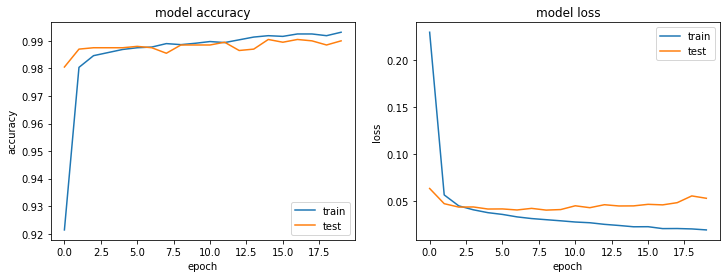

In [17]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'])

In [18]:
y_pred = model.predict(X_test) > 0.5

accuracy_score(y_test, y_pred)

63/63 [==============================] - 0s 692us/step


0.99

## confusion matrix 를 이용한 model 평가

confution matrix
 [[1390    9]
 [  11  590]]


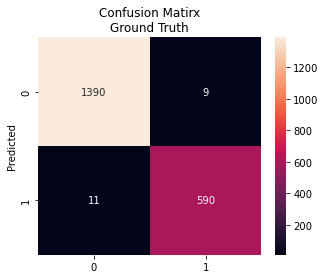

In [19]:
cm  = confusion_matrix(y_test, y_pred)

print("confution matrix\n", cm)

plt.figure(figsize=(5,4))

ax = sns.heatmap(cm, annot=True, fmt='d')
ax.set_ylabel('Predicted')
ax.set_title('Confusion Matirx\nGround Truth')
None

# 실습 

### 통신회사의 고객 이탈 여부를 logistic regression 으로 예측

In [20]:
churn_df = pd.read_csv("datasets/ChurnData.csv")

## Data pre-processing and feature selection

개별 feature 에 대한 분석 후(본 과정에서는 생략)에 Logistic Regression 에 사용할 feature 선정

tenure(가입기간), age (연령), income(수입) 으로 예측하고 churn (이탈여부) 은 integer 로 type 변경

In [21]:
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [22]:
churn_df = churn_df[['tenure', 'age', 'income', 'churn']]
churn_df['churn'] = churn_df['churn']
churn_df.head()

,tenure,age,income,churn
0,11.0,33.0,136.0,1.0
1,33.0,33.0,33.0,1.0
2,23.0,30.0,30.0,0.0
3,38.0,35.0,76.0,0.0
4,7.0,35.0,80.0,0.0


In [23]:
X = churn_df[['tenure', 'age', 'income']]
y = churn_df['churn']

### feature scaling

### Train/Test dataset 분리

### model 작성

### train the model

### prediction

### confusion matrix 작성